In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#pyplot expects RGB
def mymshow(image):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(image)

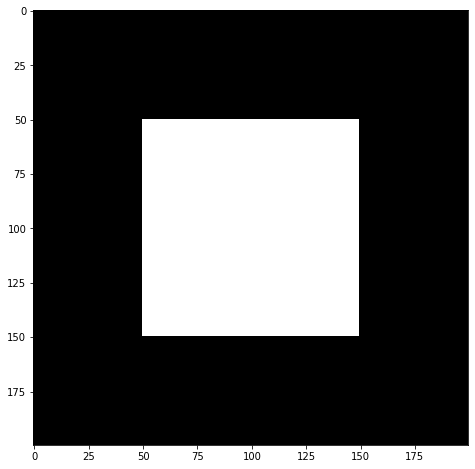

In [4]:
img = np.zeros((200, 200), dtype=np.uint8)
img[50:150, 50:150] = 255
mymshow(img)

In [5]:
ret, thresh = cv2.threshold(img, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE)
color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img = cv2.drawContours(color, contours, -1, (0,255,0), 2)

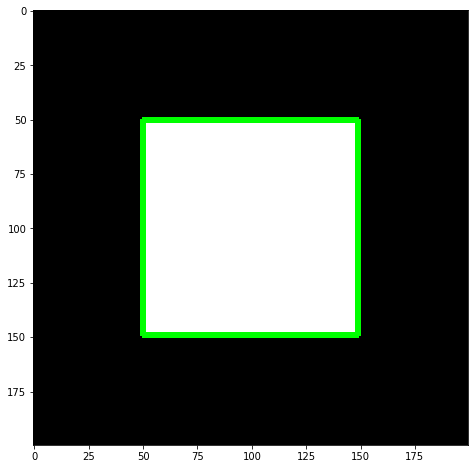

In [6]:
mymshow(img)

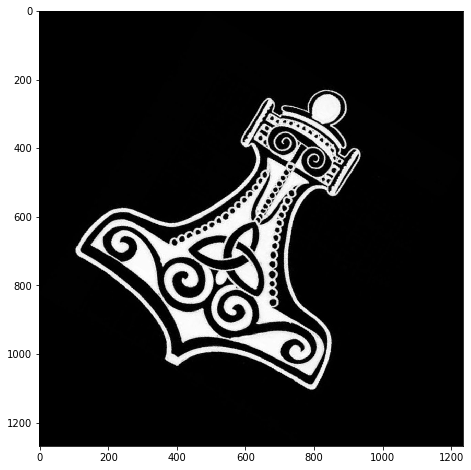

In [10]:
mymshow(cv2.imread("hammer.jpg", cv2.IMREAD_UNCHANGED))

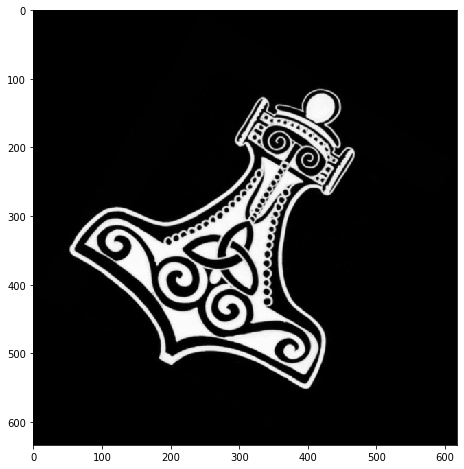

In [13]:
# downsample
img = cv2.pyrDown(cv2.imread("hammer.jpg", cv2.IMREAD_UNCHANGED))
mymshow(img)

In [15]:
ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [16]:
for c in contours:
    # find bounding box coordinates
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

    # find minimum area
    rect = cv2.minAreaRect(c)
    # calculate coordinates of the minimum area rectangle
    box = cv2.boxPoints(rect)
    # normalize coordinates to integers
    box = np.int0(box)
    # draw contours
    cv2.drawContours(img, [box], 0, (0,0, 255), 3)

    # calculate center and radius of minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # cast to integers
    center = (int(x), int(y))
    radius = int(radius)
    # draw the circle
    img = cv2.circle(img, center, radius, (0, 255, 0), 2)

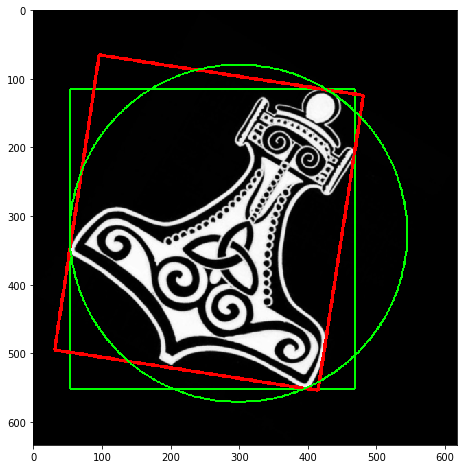

In [17]:
mymshow(img)

In [31]:
img = cv2.pyrDown(cv2.imread("hammer.jpg", cv2.IMREAD_UNCHANGED))

ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                            127, 255, cv2.THRESH_BINARY)

contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_SIMPLE)

black = np.zeros_like(img)
for cnt in contours:
    epsilon = 0.01 * cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    hull = cv2.convexHull(cnt)
    cv2.drawContours(black, [cnt], -1, (0, 255, 0), 2)
    cv2.drawContours(black, [approx], -1, (255, 255, 0), 2)
    cv2.drawContours(black, [hull], -1, (0, 0, 255), 2)

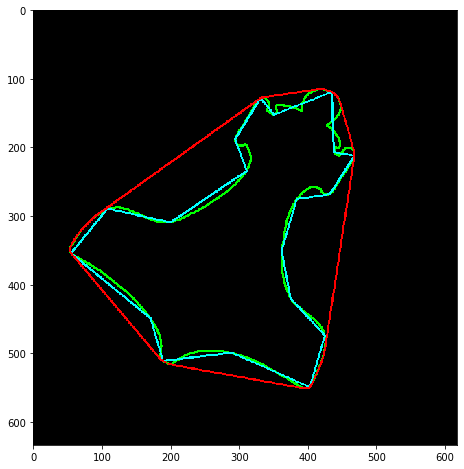

In [32]:
mymshow(black)